# Finding DnaA box in *Salmonella Enterica*

## Preprocessing data

In [18]:
txt_file = open('data\Salmonella_enterica.txt')
txt = txt_file.read()
txt_file.close()

Let's check our data

In [20]:
print(txt[:300])

>gi|16758993|ref|NC_003198.1| Salmonella enterica subsp. enterica serovar Typhi str. CT18 chromosome, complete genome
AGAGATTACGTCTGGTTGCAAGAGATCATAACAGGGGAAATTGATTGAAAATAAATATATCGCCAGCAGC
ACATGAACAAGTTTCGGAATGTGATCAATTTAAAAATTTATTGACTTAGGCGGGCAGATACTTTAACCAA
TATAGGAATACAAGACAGACAAATAAAAATGACAGAGTAC


In [6]:
txt_splited = txt.split('\n')

In [10]:
txt_splited[:5]

['>gi|16758993|ref|NC_003198.1| Salmonella enterica subsp. enterica serovar Typhi str. CT18 chromosome, complete genome',
 'AGAGATTACGTCTGGTTGCAAGAGATCATAACAGGGGAAATTGATTGAAAATAAATATATCGCCAGCAGC',
 'ACATGAACAAGTTTCGGAATGTGATCAATTTAAAAATTTATTGACTTAGGCGGGCAGATACTTTAACCAA',
 'TATAGGAATACAAGACAGACAAATAAAAATGACAGAGTACACAACATCCATGAACCGCATCAGCACCACC',
 'ACCATTACCACCATCACCATTACCACAGGTAACGGTGCGGGCTGACGCGTACAGGAAACACAGAAAAAAG']

> As we can see, we don't need the first line, and other lines should be attached to each other...

In [16]:
txt_splited = txt_splited[1:]
seq = ''.join(txt_splited)

In [25]:
print(seq[:100])

ACATGAACAAGTTTCGGAATGTGATCAATTTAAAAATTTATTGACTTAGGCGGGCAGATACTTTAACCAATATAGGAATACAAGACAGACAAATAAAAAT


Now the data is ready.

## Skew Diagram
Let's find the location of the Ori based on the Skew Diagram.

In [26]:
from functions import skew_diagram

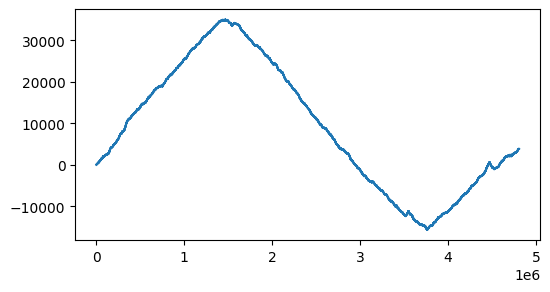

In [28]:
skew_list, min_index = skew_diagram(seq)

In [30]:
print(f'Our hypothesis for ori index is: {min_index}')

Our hypothesis for ori index is: [3764786, 3764788]


## Finding the DnaA boxes
We choose a 1000 nucleotide region and search for common patterns.

In [33]:
from functions import freq_word_with_mistmatch_reverse

In [68]:
seq_slide = seq[min_index[0] - 500 : min_index[0] + 500]

In [69]:
freq_patterns = freq_word_with_mistmatch_reverse(seq_slide, 9, 1)

In [70]:
print(*freq_patterns)

TTATCCACA TGTGGATAA
